<a href="https://colab.research.google.com/github/kmk3593/google_drive/blob/main/hg_chapter6/chapter_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석 (PCA)

### PCA (주성분 분석)
- 차원축소의 개념
- PCA 개념
- 과일 사진의 겨우, 10,000개의 픽셀 (높이 x 너비)
- 10,000개의 특성이 있는 셈(차원)
- 정형데이터에서도 활용 가능
  + 문자열 데이터, 수치형 데이터 (연속형 데이터, 비연속형 데이터)
  + 캐글 대회 : 수치형 컬럼 304개
    + 연산은 RAM에서 처리
    + 라면을 5개 끓여야 함 / 냄비 크기는 3개 용량

- 차원축소 = 일부 특성을 선택하여 데이터 크기를 줄임
  - 머신러닝 측면 : 과대적합 방지 & 성능 향상
  - 데이터가 너무 많으니까 RAM에 부하가 걸린다. 
  - 따라서 데이터를 줄이고 과대적합을 방지하기 위한 것

- 양적 데이터 사이의 분산-공분산 관계를 이용해서 선형결합으로 표시되는 주성분을 찾음
- 2~3개의 주성분으로 전체 변동을 찾는 것이 PCA

p326
- 그래프를 보면, 처음 10개의 주성분이 (10,000개의 픽셀)
- 굳이 10,000개의 픽셀을 전부 쓸 필요가 없다.

- 알고리즘 구성할 때, 필요한 데이터 픽셀 수, 300 x 10,000개 픽셀
- 원래는 300 x 10,000개 픽셀 필요
- 그런데, 300 x pc 10 주성분으로 줄임
- 기존 1시간 걸림 / 이제 10분 걸림
- 그럼에도 불구하고, 분류가 더 잘되더라.

## PCA 클래스

### 데이터 불러오기

In [12]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:16:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:16:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:16:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

- 배열로 업로드

In [13]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

- sklearn.decomposition 모듈
  - 사이킷런은 이 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다.
  - k-평균과 마찬가지로 비지도 학습이기 때문에 fit()메서드에 타깃값을 제공하지 않는다.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)

# PCA 50개 성분으로 300 x 10000 픽셀값을 압축
pca.fit(fruits_2d)

PCA(n_components=50)

- PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있다.

In [15]:
print(pca.components_.shape)

(50, 10000)


- 그래프 그리기
  - draw_fuits()함수를 사용해서 이 주성분을 그림으로 그려보자.

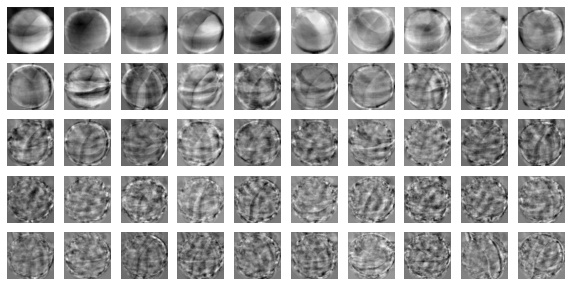

In [16]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [17]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 데이터의 원래 크기 대비해서 1/200 줄임
- 용량이 줄었다는 것과 똑같음

### 원본 데이터 재구성
- 10,000개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만, 그래도 쓸만하다.

In [18]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


- 그래프 작성
  - 10000개의 데이터가 복원되었다.
  - 이 데이터를 100 x 100 크기로 바꾸어 100개씩 나누어 출력한다.

In [19]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


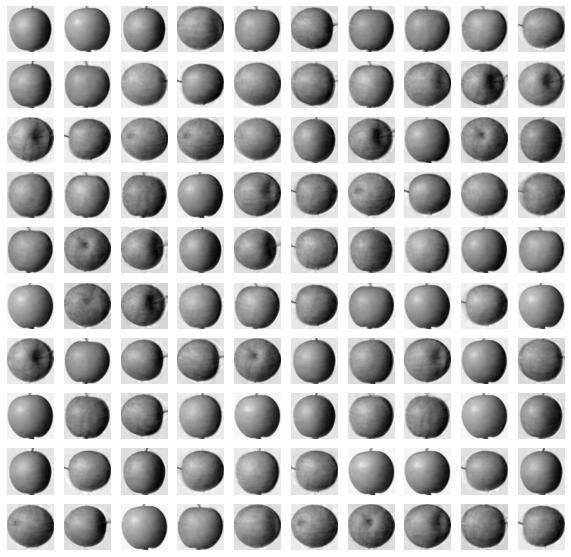

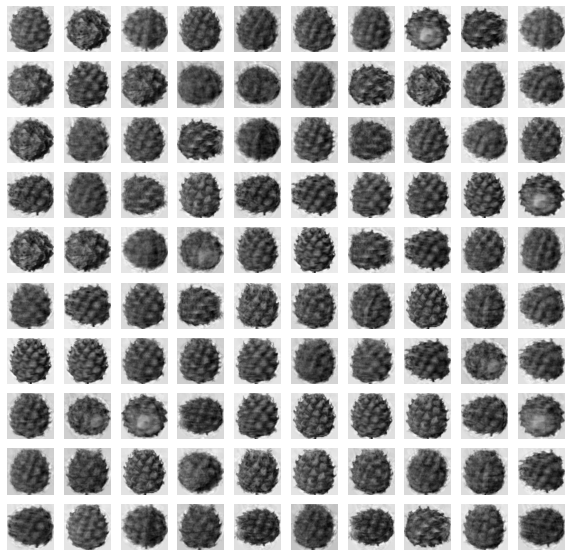

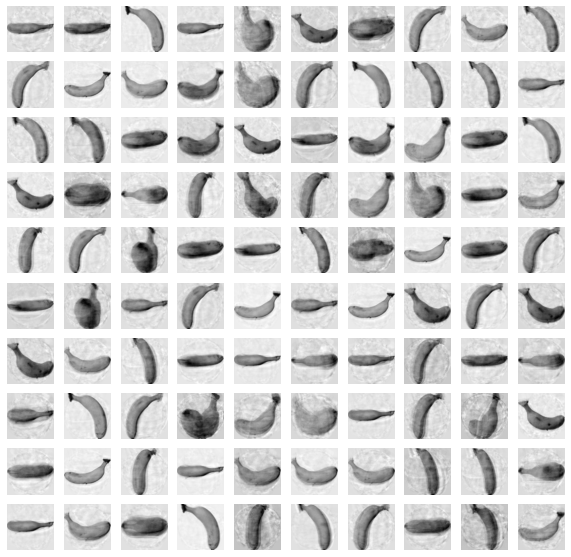

In [20]:
# 압축을 풀고 사용하는 연쇄적인 과정
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n")

### 설명된 분산

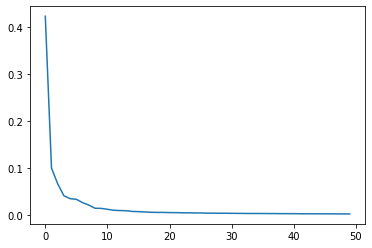

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현한다.
- 11개 주성분부터 ~50개까지는 잘 설명이 안됨

In [22]:
print(np.sum(pca.explained_variance_ratio_))

0.9215782334086065


### 다른 알고리즘과 함께 사용하기
- 3개의 과일 사진 분류 위해 로지스틱 회귀

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


- 교차검증 진행

In [25]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.5795912265777587


- PCA 수행 후, 학습 시간 비교

In [27]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.12322616577148438


- PCA 수행 후, fit_time이 짧게 단축되었다.
  - 1.57 -> 0.12 로 시간이 짧아졌다.
  - 그러니 특성이 너무 많으면 PCA를 사용하자.

- 주 성분의 매개변수 개수 지정, 분산비율 지정

In [28]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


- 주성분을 2개로 압축시킴.

In [29]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [30]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.051814031600952146


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 차원 축소된 데이터를 k-평균 알고리즘에 추가한다.

In [31]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


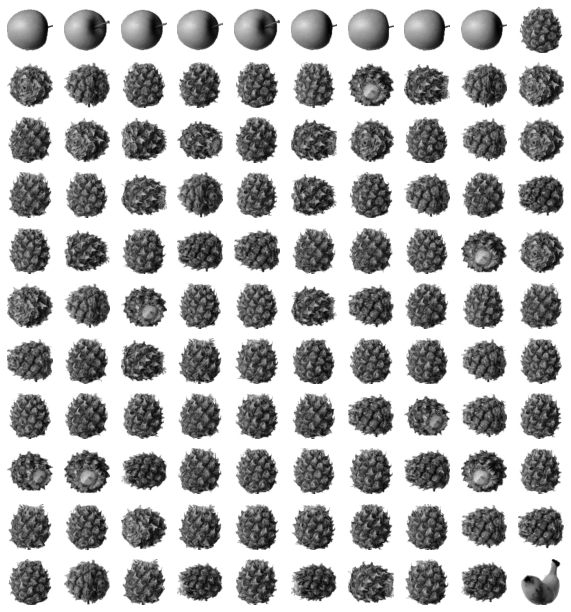

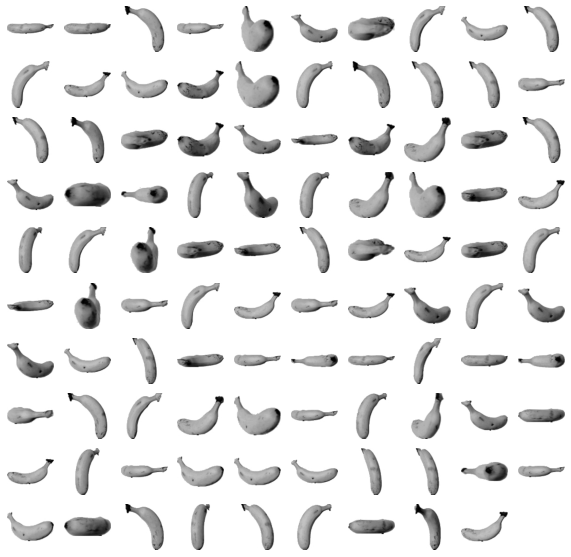

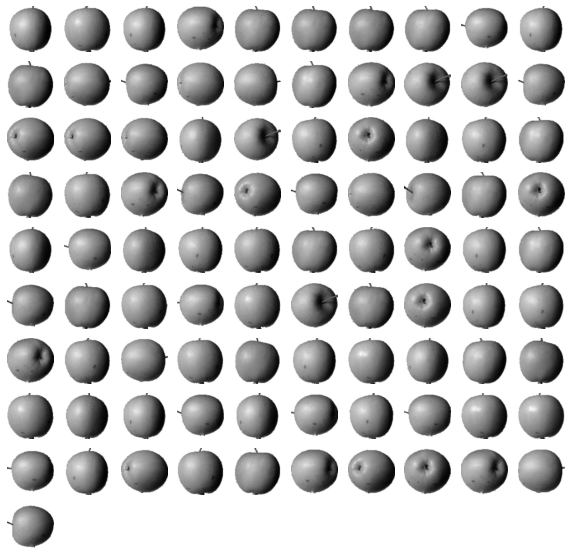

In [32]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

- 시각화로 뿌려주기

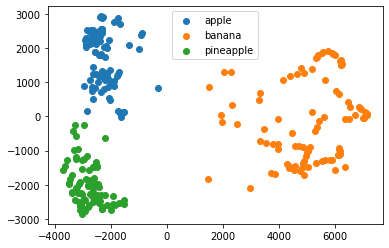

In [34]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()